In [1]:
from mouseBehavior import mouseBehaviorData as mbd
import numpy as np
import os, glob

In [2]:
mouselistfile =  r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline\good_slc_mouse_IDs.npy"
mouseInfo = np.load(mouselistfile)
mouseInfo

array([431018, 431023, 431245, 431246, 431249, 431252, 432375, 433245,
       433248, 435838, 436662, 437204, 440298, 442709, 445002, 445270,
       445271, 447663, 448897, 448900, 449441, 450471, 450705, 450710,
       451787, 451790, 453909, 453911, 453913, 456564, 456912, 456915,
       456916, 456917, 457766, 458151, 458155, 459768, 459773, 459777,
       460746, 461946, 462544, 462885, 462887, 464204, 464206, 464207,
       467190, 472271, 472873, 472874, 476067, 476631, 477052, 479458,
       479461, 479835, 479839, 481295, 483803, 484408, 484627, 484631,
       485152, 488458, 491060], dtype=int64)

In [4]:
def checkforpickle(directory, mouseID):
    pkllist = [f for f in os.listdir(directory) if '.pkl' in f]
    mouseID = str(mouseID)
    pklpath = None
    for pkl in pkllist:
        if pkl[:6]==mouseID:
            pklpath = os.path.join(directory, pkl)
    return pklpath

In [23]:
pkldir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline"
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline\dataframes"
for mouse in mouseInfo:
    if isinstance(mouseInfo[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
            m.beh_df.drop(columns=['cumulative_rewards'], inplace=True)
            m.save_dataframe_separately(dataframe_save_dir)
    
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            m.get_mouse_metadata()
            m.add_weight_and_water_history()
            
        m.saveDirectory = pkldir
        m.saveToPickle()
    except:
        print('failed to load data for mouse ' + mouse)
        continue

431018
431023
431245
431246
431249
431252
432375
433245
433248
435838
436662
437204
440298
442709
445002
445270
445271
447663
448897
448900
449441
450471
450705
450710
451787
451790
453909
453911
453913
456564
456912
456915
456916
456917
457766
458151
458155
459768
459773
459777
460746
461946
462544
462885
462887
464204
464206
464207
467190
472271
472873
472874
476067
476631
477052
479458
479461
479835
479839
481295
483803
484408
484627
484631
485152
488458
491060


In [13]:
m.beh_df[['stage', 'WE_ml', 'Wt_g', 'session_datetime_local', 'earned_rewards', 'total_rewards', 'age']]

,stage,WE_ml,Wt_g,session_datetime_local,earned_rewards,total_rewards,age
2,OPHYS_5_images_A_passive,,,2019-12-17 09:29:14.254000-08:00,0,0,124
3,OPHYS_6_images_A,0.29,19.39,2019-12-16 09:16:05.363000-08:00,38,43,123
4,OPHYS_4_images_A,0.59,20.30,2019-12-13 09:10:21.396000-08:00,80,85,120
5,OPHYS_3_images_B,0.98,20.35,2019-12-12 09:10:58.122000-08:00,137,142,119
6,OPHYS_2_images_B_passive,,,2019-12-11 09:11:27.745000-08:00,0,0,118
7,OPHYS_1_images_B,,,2019-12-10 12:53:17.355000-08:00,118,123,117
8,OPHYS_3_images_B,0.04,19.76,2019-12-09 09:04:18.208000-08:00,2,7,116
9,OPHYS_3_images_B,0.03,19.62,2019-12-06 08:52:52.903000-08:00,0,5,113
10,OPHYS_1_images_B,0.27,19.7,2019-12-05 09:15:09.313000-08:00,35,40,112
11,OPHYS_0_images_B_habituation,0.32,20.2,2019-12-04 09:16:57.305000-08:00,42,47,111


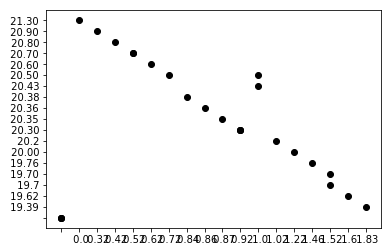

In [8]:
from matplotlib import pyplot as plt
plt.plot(m.beh_df['WS_ml'], m.beh_df['Wt_g'], 'ko')

In [14]:
m.beh_df.iloc[5]

id                                                                   993541036
behavior_training_id                                                      None
created_at                                          2019-12-10 22:11:01.193171
updated_at                                          2019-12-11 05:01:15.157702
storage_directory            /allen/programs/braintv/production/visualbehav...
temp_output_file_location    /allen/programs/braintv/production/incoming/vi...
foraging_id                               c3444858-3483-41fb-9ec1-47a1093e4c17
donor_id                                                             962177495
ophys_session_id                                                   9.93507e+08
equipment_id                                                         506540632
user_id                                                              877318103
rig                                                                        2P3
pklfile                      //allen/programs/braint

In [3]:
m = mbd(mouse_id=mouseInfo[0], daysBeforeHandoff=100)
m.buildBehaviorDataframe(all_sessions=True)

Found non-behavior pickle file: //allen/programs/braintv/production/visualbehavior/prod0/specimen_788982914/behavior_session_819904061\819721037.pkl


mouseBehavior.py:134: RuntimeWarning: invalid value encountered in double_scalars
  return z[0] - z[1]
mouseBehavior.py:130: RuntimeWarning: invalid value encountered in divide
  engagedTrialFARate = fas/float(fas+crs)
c:\users\svc_ccg\appdata\local\continuum\anaconda3\envs\lims\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
c:\users\svc_ccg\appdata\local\continuum\anaconda3\envs\lims\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)


In [11]:
m.beh_df.columns

Index([u'id', u'behavior_training_id', u'created_at', u'updated_at',
       u'storage_directory', u'temp_output_file_location', u'foraging_id',
       u'donor_id', u'ophys_session_id', u'equipment_id', u'user_id', u'rig',
       u'pklfile', u'trials', u'stage', u'session_datetime',
       u'session_datetime_local', u'session_datetime_utc',
       u'cumulative_rewards', u'timeFromLastSession', u'engaged_dprime',
       u'session_day_of_week'],
      dtype='object')

In [12]:
t = m.beh_df['trials'].iloc[0]

In [13]:
t.keys()

Index([u'index', u'auto_rewarded', u'change_contrast', u'change_frame',
       u'change_image_category', u'change_image_name', u'change_ori',
       u'change_time', u'cumulative_reward_number', u'cumulative_volume',
       u'delta_ori', u'endframe', u'endtime', u'initial_contrast',
       u'initial_image_category', u'initial_image_name', u'initial_ori',
       u'lick_times', u'optogenetics', u'response_latency', u'response_time',
       u'response_type', u'reward_frames', u'reward_times', u'reward_volume',
       u'rewarded', u'scheduled_change_time', u'startframe', u'starttime',
       u'trial_length', u'stimulus_distribution', u'task', u'user_id',
       u'stim_duration', u'LDT_mode', u'distribution_mean', u'stimulus',
       u'mouse_id', u'prechange_minimum', u'computer_name',
       u'blank_duration_range', u'response_window', u'behavior_session_uuid',
       u'blank_screen_timeout', u'session_duration', u'stage',
       u'startdatetime', u'date', u'year', u'month', u'day', u'hour'

In [8]:
m.buildBehaviorDataframe(all_sessions=True)
m.beh_df['rig']

mouseBehavior.py:134: RuntimeWarning: invalid value encountered in double_scalars
  return z[0] - z[1]


1         NP3
2         NP3
3         NP3
4         NP3
5         NP3
6         NP3
7         NP3
8         NP3
9         NP3
10        NP3
11        NP3
12        NP3
13        NP3
14        NP3
15        NP3
16        NP3
17        NP3
18        NP3
19        NP3
20        NP3
21        NP3
22        NP3
23        NP3
24        NP3
25        NP3
26        NP3
27        NP3
28        NP3
29        NP3
30        NP3
       ...   
41         F3
42         F3
43         F3
44         F3
45         F3
46         F3
47         F3
48         F3
49         F3
50         F3
51         F3
52         F3
53         F3
54         F3
55         F3
56         F3
57         F3
58         F3
59         F3
60         F3
61         F3
62         F3
63         F3
64         F3
65         F6
66    unknown
67    unknown
68         F2
69         F2
70         F5
Name: rig, Length: 70, dtype: object

In [11]:
m.beh_df.iloc[-3]

id                                                                   981740006
behavior_training_id                                                      None
created_at                                          2019-11-13 19:31:00.813789
updated_at                                          2019-11-13 19:31:02.230230
storage_directory            /allen/programs/braintv/production/visualbehav...
temp_output_file_location    /allen/programs/braintv/production/incoming/vi...
foraging_id                               406c3154-c629-44d7-9eef-abf1da8c2087
donor_id                                                             962177495
ophys_session_id                                                           NaN
equipment_id                                                         791748416
user_id                                                              648047749
rig                                                                         F1
pklfile                      //allen/programs/braint

In [9]:
trials = m.beh_df.iloc[-3]['trials']

In [10]:
trials.keys()

Index([u'index', u'auto_rewarded', u'change_contrast', u'change_frame',
       u'change_image_category', u'change_image_name', u'change_ori',
       u'change_time', u'cumulative_reward_number', u'cumulative_volume',
       u'delta_ori', u'endframe', u'endtime', u'initial_contrast',
       u'initial_image_category', u'initial_image_name', u'initial_ori',
       u'lick_times', u'optogenetics', u'response_latency', u'response_time',
       u'response_type', u'reward_frames', u'reward_times', u'reward_volume',
       u'rewarded', u'scheduled_change_time', u'startframe', u'starttime',
       u'trial_length', u'stimulus_distribution', u'task', u'user_id',
       u'stim_duration', u'LDT_mode', u'distribution_mean', u'stimulus',
       u'mouse_id', u'prechange_minimum', u'computer_name',
       u'blank_duration_range', u'response_window', u'behavior_session_uuid',
       u'blank_screen_timeout', u'session_duration', u'stage',
       u'startdatetime', u'date', u'year', u'month', u'day', u'hour'

In [10]:
print(trials['cumulative_reward_number'].max())
print(trials[trials['response_type']!='EARLY_RESPONSE']['auto_rewarded'].sum())


86
22


In [24]:
trials[trials['response_type'] != 'EARLY_RESPONSE'][['response_type','auto_rewarded', 'cumulative_reward_number', 'cumulative_volume']]

,response_type,auto_rewarded,cumulative_reward_number,cumulative_volume
3,HIT,True,1,0.005
4,HIT,True,2,0.010
26,HIT,True,3,0.015
55,HIT,True,4,0.020
87,HIT,True,5,0.025
97,FA,None,5,0.025
104,HIT,False,6,0.035
151,CR,None,6,0.035
161,HIT,False,7,0.045
175,HIT,False,8,0.055


In [30]:
m.Maternal_Index
m.beh_df['Maternal_Index'] = m.Maternal_Index
m.beh_df.head()

,id,behavior_training_id,created_at,updated_at,storage_directory,temp_output_file_location,foraging_id,donor_id,ophys_session_id,equipment_id,...,session_datetime_utc,cumulative_rewards,timeFromLastSession,engaged_dprime,session_day_of_week,WE_ml,WS_ml,weight_datetime,Wt_g,Maternal_Index
2,994880774,None,2019-12-17 18:45:58.920609,2019-12-18 05:11:40.830527,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,80e3879f-873a-4d0e-9c50-3c076daaee35,962177495,994869518.0,506540632,...,2019-12-17 17:29:14.254000+00:00,0,24.218889,NaN,1,,,,,473628.0
3,994705194,None,2019-12-16 18:36:00.208328,2019-12-17 05:06:51.049206,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,1e137a99-937a-4818-ba47-7c7a4ef0a7e0,962177495,994689000.0,506540632,...,2019-12-16 17:16:05.363000+00:00,35,72.095278,0.960346,0,0.29,1.83,2019-12-16 10:36:02,19.39,473628.0
4,994174745,None,2019-12-13 18:26:00.845921,2019-12-14 08:58:28.807791,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,190791ad-21ee-4d0b-9663-733c029537cc,962177495,994137503.0,506540632,...,2019-12-13 17:10:21.396000+00:00,75,23.989722,inf,4,0.59,0.92,2019-12-13 10:30:11,20.30,473628.0
5,993957378,None,2019-12-12 18:31:02.457549,2019-12-13 05:01:41.094178,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,1cd63fae-67b2-4856-963b-3dceae77ec62,962177495,993944055.0,506540632,...,2019-12-12 17:10:58.122000+00:00,132,23.991667,1.547587,3,0.98,0.87,2019-12-12 10:30:31,20.35,473628.0
6,993706715,None,2019-12-11 18:30:55.499705,2019-12-12 04:51:38.172886,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,cd5ce955-d6ed-4778-a697-b3604ecb507f,962177495,993669512.0,506540632,...,2019-12-11 17:11:27.745000+00:00,0,20.302778,NaN,2,,,,,473628.0


In [49]:
import pandas as pd

m.beh_df.apply(lambda row: (row['session_datetime_local'].tz_localize(None) - m.birth_date).days, axis=1)

2     124
3     123
4     120
5     119
6     118
7     117
8     116
9     113
10    112
11    111
12    110
13    109
14    104
15    103
16    102
17     99
18     98
19     97
20     96
21     95
22     92
23     91
24     90
25     88
26     85
dtype: int64

In [54]:
saveDir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\ophys_pipeline\dataframes"
m.beh_df.to_pickle(os.path.join(saveDir, 'test'))

In [55]:
df = pd.read_pickle(os.path.join(saveDir, 'test'))

In [57]:
#df.head()
df[['stage', 'WE_ml', 'Wt_g', 'session_datetime_local', 'cumulative_rewards']]

,stage,WE_ml,Wt_g,session_datetime_local,cumulative_rewards
2,OPHYS_5_images_A_passive,,,2019-12-17 09:29:14.254000-08:00,0
3,OPHYS_6_images_A,0.29,19.39,2019-12-16 09:16:05.363000-08:00,35
4,OPHYS_4_images_A,0.59,20.30,2019-12-13 09:10:21.396000-08:00,75
5,OPHYS_3_images_B,0.98,20.35,2019-12-12 09:10:58.122000-08:00,132
6,OPHYS_2_images_B_passive,,,2019-12-11 09:11:27.745000-08:00,0
7,OPHYS_1_images_B,,,2019-12-10 12:53:17.355000-08:00,108
8,OPHYS_3_images_B,0.04,19.76,2019-12-09 09:04:18.208000-08:00,-3
9,OPHYS_3_images_B,0.03,19.62,2019-12-06 08:52:52.903000-08:00,-6
10,OPHYS_1_images_B,0.27,19.7,2019-12-05 09:15:09.313000-08:00,29
11,OPHYS_0_images_B_habituation,0.32,20.2,2019-12-04 09:16:57.305000-08:00,36


In [25]:
#m.beh_df.drop(columns=['cumulative_rewards'], inplace=True)
#m.beh_df.iloc[0]
m.beh_df.iloc[0]['pklfile']

'//allen/programs/braintv/production/visualbehavior/prod4/specimen_962177507/behavior_session_994880774\\994869518.pkl'